## Visualization

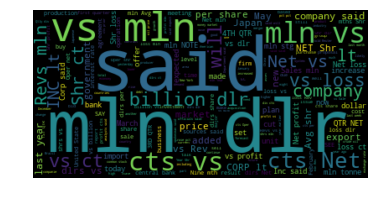

In [5]:
import matplotlib.pyplot as plt
from nltk.corpus import reuters
from wordcloud import WordCloud
 
wc = WordCloud().generate(' '.join(reuters.words()))
 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import numpy as np
import pandas as pd
import re
import itertools
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [3]:
data = 'imdb_labelled.txt'



texts = []
labels = []

with open(dataa) as f:
        for line in f:
            splitted = line.split()
            labels.append(int(splitted[-1]))
            texts.append(' '.join(splitted[:-1]))
            data = pd.DataFrame(columns=['text', 'label'])
            data['text'] = texts
            data['label'] = labels

In [4]:
data


,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [10]:
import  matplotlib.pyplot as plt
import numpy as pd
from sklearn import datasets, svm

%matplotlib inline

In [7]:
def clean(text):
    text=re.sub(r'[0-9]+', r'',text)
    text = re.sub(r'[^\w]', ' ', text)
    #word level tokenization
    txt = nltk.tokenize.word_tokenize(text)
    #Stop word Removal
    #stop_words = set(stopwords.words('english'))
    txt=[word for word in txt if word not in stop_words]
    #Lemmatizer
    for j in range(len(txt)):
        txt[j] = lem.lemmatize(txt[j], "v")
    return " ".join(txt)

In [8]:
data['text'] = data['text'].map(lambda x: clean(x))

In [9]:
data

,text,label
0,A slow move aimless movie distress drift young...,0
1,Not sure lose flat character audience nearly h...,0
2,Attempting artiness black white clever camera ...,0
3,Very little music anything speak,0
4,The best scene movie Gerardo try find song kee...,1
5,The rest movie lack art charm mean If emptines...,0
6,Wasted two hours,0
7,Saw movie today think good effort good message...,1
8,A bite predictable,0
9,Loved cast Jimmy Buffet science teacher,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
text     1000 non-null object
label    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


## Positive Data

In [17]:
pos_tweets = data[data.label == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

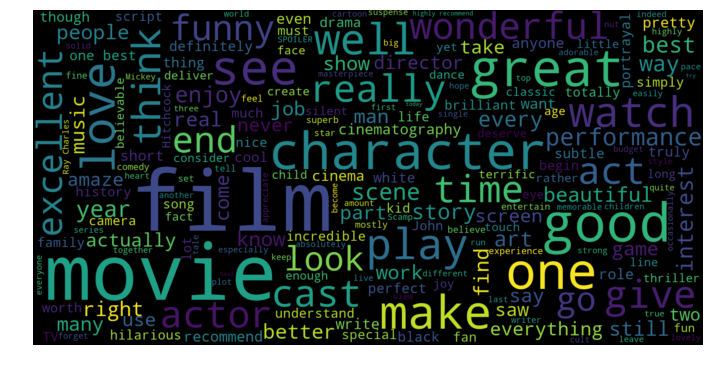

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Negative Data

In [14]:
neg_tweets = data[data.label == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

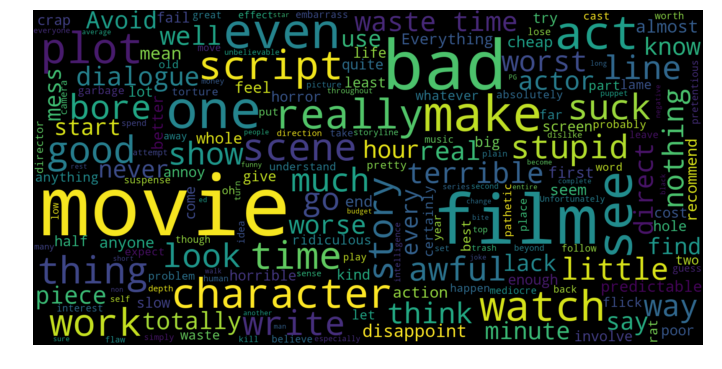

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()